# Processing solution SAXS data txt files from Tom

In [1]:
# Imports

import pathlib
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from tqdm.auto import tqdm

In [49]:
txtsPath

PosixPath('/Users/andrew/Library/CloudStorage/OneDrive-UCB-O365/research/data_analysis/giwaxs_suite/processed_data/solution-saxs-5IDD/Acceptor_BHJ_SAXS')

In [9]:
# Define paths

notebookPath = pathlib.Path.cwd()
outPath = notebookPath.parent.parent.joinpath('processed_data/solution-saxs-5IDD')
txtsPath = outPath.joinpath('Acceptor_BHJ_SAXS')

In [54]:
txt_files = sorted(txtsPath.glob('*txt'))
txt_files = txt_files[1:]
# txt_files = (txt_files[4:5] + txt_files[6:7] + txt_files[10:11] + txt_files[12:])

In [55]:
# [f.name for f in (txt_files[4:5] + txt_files[6:7] + txt_files[10:11] + txt_files[12:])]
[f.name for f in txt_files]

['Y12_CB_sol629_buf627_emp614.txt',
 'Y12_CN_sol623_buf622_emp614.txt',
 'Y6_CB_sol628_buf627_emp614.txt',
 'Y6_CN_sol620_buf619_emp614.txt',
 'Y6_CN_sol628_buf627_emp614.txt',
 'Y6_TO_sol648_buf647_emp614.txt',
 'Y7BO_CB_sol630_buf627_emp614.txt',
 'Y7BO_CN_sol624_buf622_emp614.txt',
 'Y7_CB_sol633_buf634_emp614.txt',
 'Y7_CB_sol633_buf634_emp614_98fudge.txt',
 'Y7_CB_sol633_buf634_emp614_fudge.txt',
 'Y7_CN_sol625_buf622_emp614.txt']

In [56]:
samp_DS_rows = []
for txt_file in tqdm(txt_files):
    filename_split = txt_file.stem.split('_')
    
    data = np.loadtxt(txt_file)
    material = filename_split[0]
    solvent = filename_split[1]
    sample_name = material+'-'+solvent
    
    sol = filename_split[2]
    buf = filename_split[3]
    emp = filename_split[4]
    
    
    samp_DS = xr.Dataset(data_vars={'intensity': ('q', data[:, 1]),
                                    'error': ('q', data[:, 2])},
                         coords={'q':data[:,0],
                                 'sample_name':[sample_name], 
                                 'sol':('sample_name', [int(sol[3:])]),
                                 'buf':('sample_name', [int(buf[3:])]),
                                 'emp':('sample_name', [int(emp[3:])])})

    samp_DS_rows.append(samp_DS)
    
DS = xr.concat(samp_DS_rows, dim='sample_name')
DS

  0%|          | 0/12 [00:00<?, ?it/s]

<xarray.Dataset>
Dimensions:      (sample_name: 12, q: 2113)
Coordinates:
  * q            (q) float64 0.002496 0.002675 0.002855 ... 4.45 4.454 4.458
  * sample_name  (sample_name) <U7 'Y12-CB' 'Y12-CN' 'Y6-CB' ... 'Y7-CB' 'Y7-CN'
    sol          (sample_name) int64 629 623 628 620 628 ... 624 633 633 633 625
    buf          (sample_name) int64 627 622 627 619 627 ... 622 634 634 634 622
    emp          (sample_name) int64 614 614 614 614 614 ... 614 614 614 614 614
Data variables:
    intensity    (sample_name, q) float64 -1.919 -1.452 ... 6.441e-06 3.92e-06
    error        (sample_name, q) float64 0.2304 0.1696 ... 2.399e-05 2.537e-05

In [34]:
DS.to_zarr(outPath.joinpath('acceptors.zarr'), mode='w')

In [35]:
DS = xr.open_zarr(outPath.joinpath('acceptors.zarr')).compute()
DS

<xarray.Dataset>
Dimensions:      (sample_name: 4, q: 2113)
Coordinates:
    buf          (sample_name) int64 619 647 634 622
    emp          (sample_name) int64 614 614 614 614
  * q            (q) float64 0.002496 0.002675 0.002855 ... 4.45 4.454 4.458
  * sample_name  (sample_name) <U5 'Y6-CN' 'Y6-TO' 'Y7-CB' 'Y7-CN'
    sol          (sample_name) int64 620 648 633 625
Data variables:
    error        (sample_name, q) float64 0.6221 0.5295 ... 2.399e-05 2.537e-05
    intensity    (sample_name, q) float64 1.416 1.055 ... 6.441e-06 3.92e-06

In [45]:
%matplotlib widget

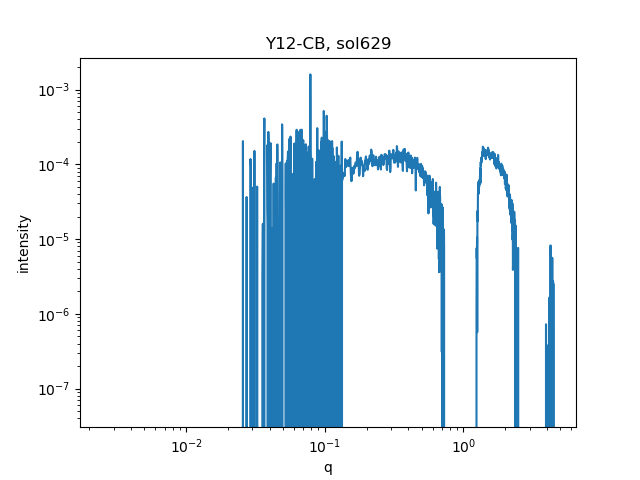

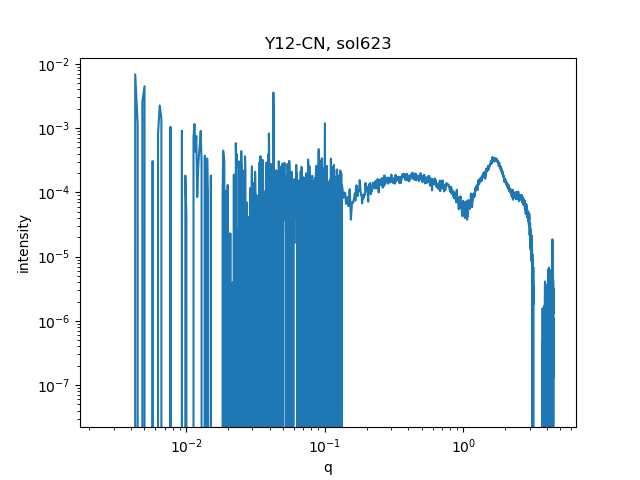

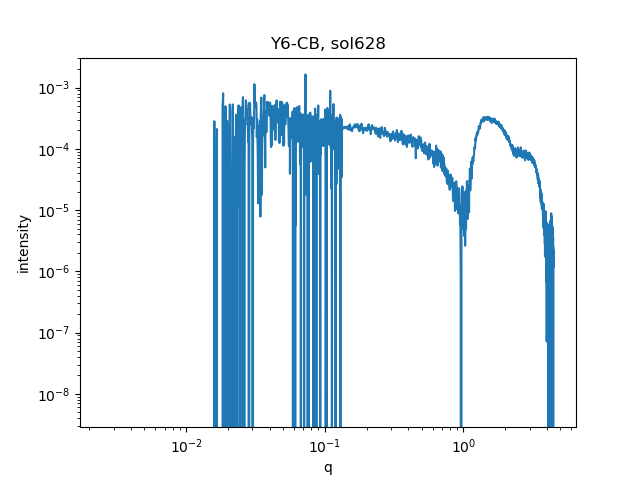

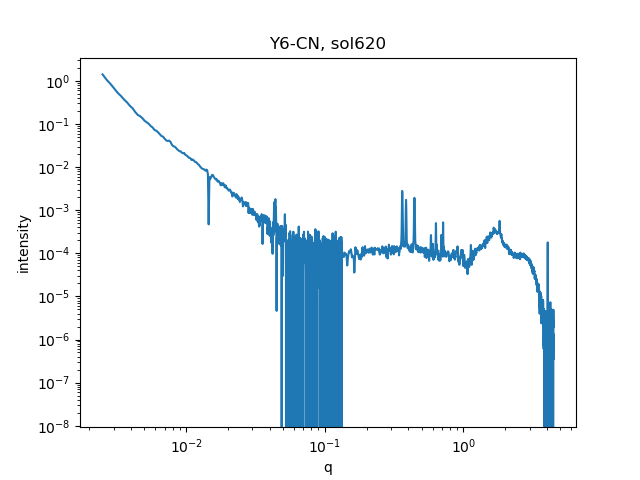

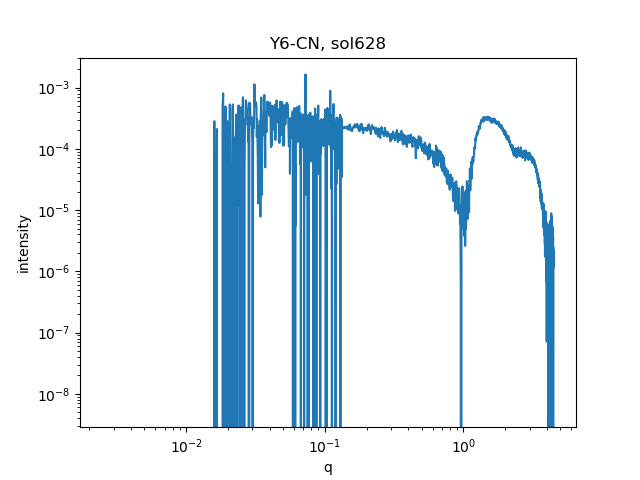

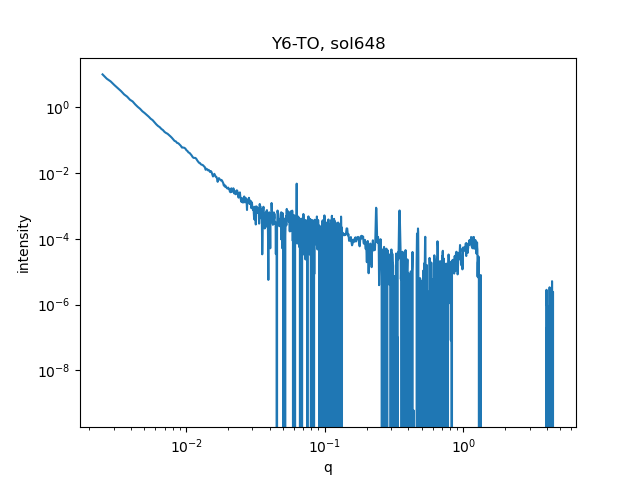

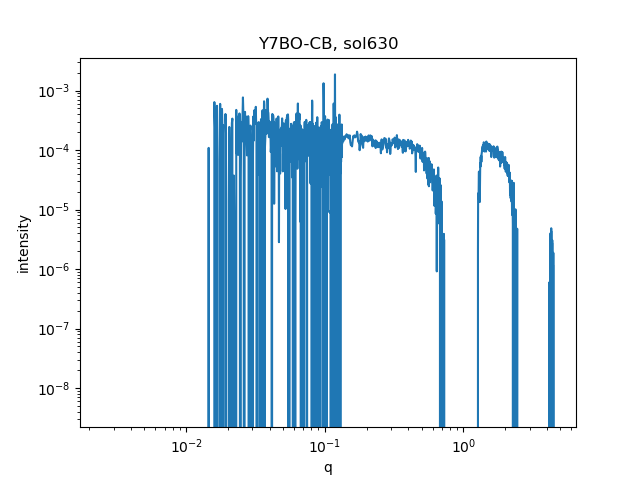

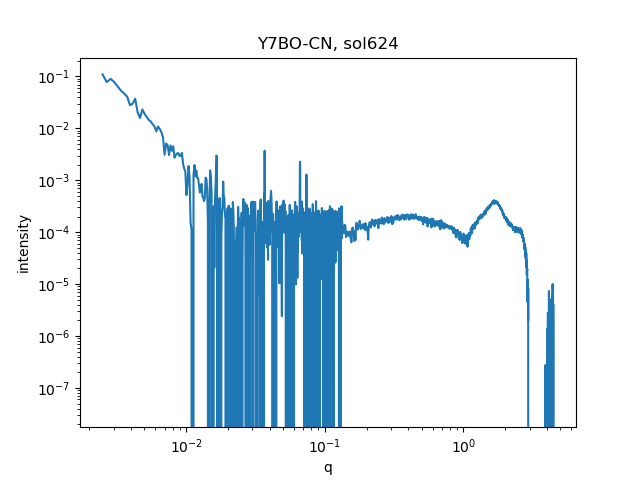

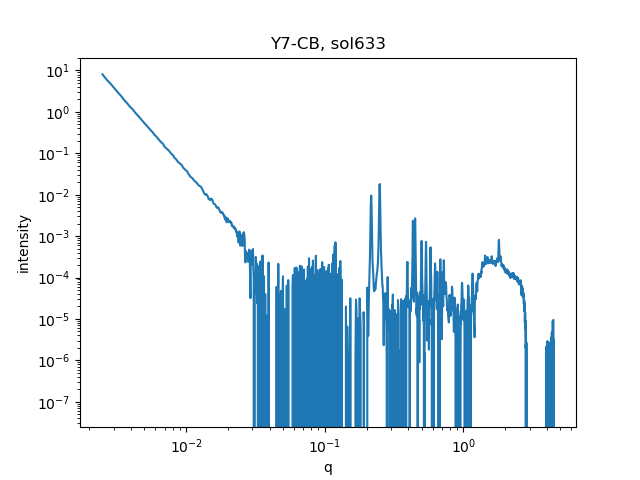

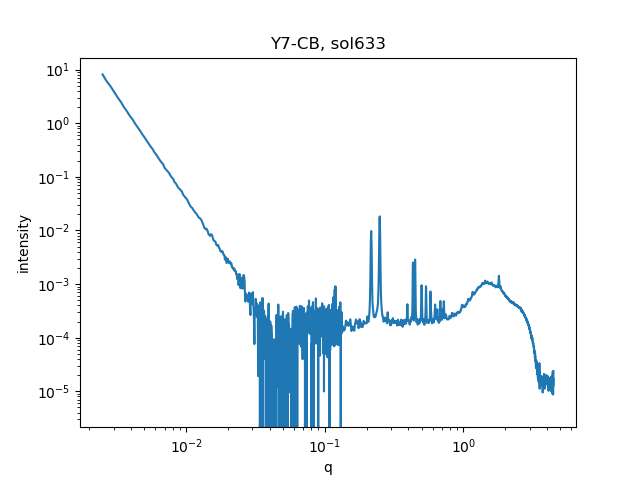

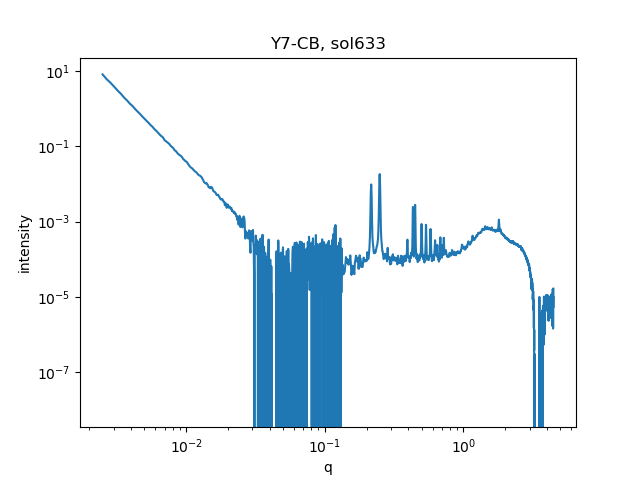

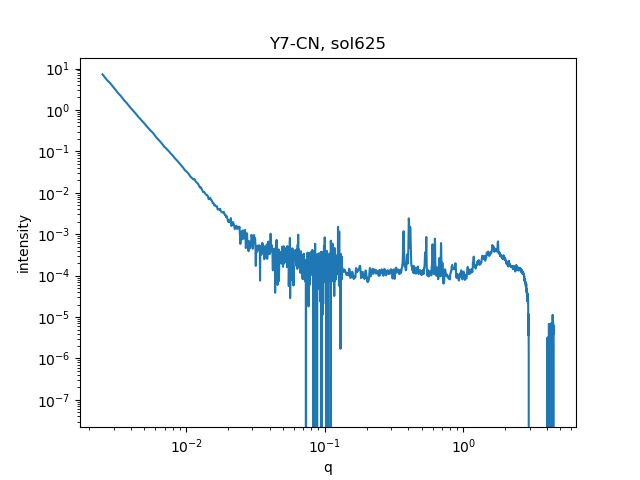

In [57]:
plt.close('all')
for DA in DS['intensity']:
    fig, ax = plt.subplots()
    DA.plot(ax=ax, xscale='log',yscale='log')
    ax.set_title(f'{DA.sample_name.values}, sol{DA.sol.values}')
    plt.show()

## for txt_file in txt_files:
#     data = np.loadtxt(txt_file)
#     print(len(data[:,0]))
#     plt.plot(data[:,0], data[:,1])
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.show()
#     plt.close('all')